# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app",no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
scores = []
for N in range(0,100):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = np.random.randint(action_size)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    scores.append(score)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


/Users/florian/opt/anaconda3/envs/UnityML/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


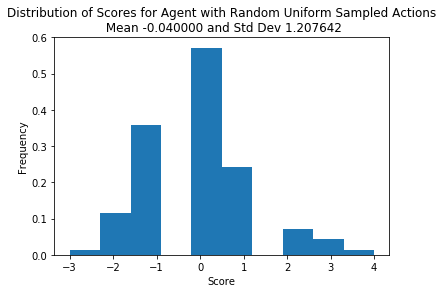

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for Agent with Random Uniform Sampled Actions\n Mean {:2f} and Std Dev {:2f}'.format(np.mean(scores), np.std(scores)))
plt.hist(scores, normed=1)
plt.savefig('distribution_random_agent.png')

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

Parameters = <generator object Module.parameters at 0x114cd27d8>
299
Episode 1	Average Score: 1.00 	Average Loss: 0.01301731 xxx299
Episode 2	Average Score: 0.50 	Average Loss: 0.00214809 xxx299
Episode 3	Average Score: 0.00 	Average Loss: 0.00209542 xxx299
Episode 4	Average Score: -0.25 	Average Loss: 0.00282861 xxx299
Episode 5	Average Score: -0.20 	Average Loss: 0.00186995 xxx299
Episode 6	Average Score: 0.00 	Average Loss: 0.00183958 xxx299
Episode 7	Average Score: 0.00 	Average Loss: 0.00142616 xxx299
Episode 8	Average Score: 0.00 	Average Loss: 0.00142671 xxx299
Episode 9	Average Score: -0.11 	Average Loss: 0.00156872 xxx299
Episode 10	Average Score: -0.10 	Average Loss: 0.00185001 xxx299
Episode 11	Average Score: -0.27 	Average Loss: 0.00223467 xxx299
Episode 12	Average Score: -0.17 	Average Loss: 0.00266107 xxx299
Episode 13	Average Score: -0.23 	Average Loss: 0.00304041 xxx299
Episode 14	Average Score: -0.21 	Average Loss: 0.00286156 xxx299
Episode 15	Average Score: -0.27 	Ave

Episode 126	Average Score: 0.78 	Average Loss: 0.00765028 xxx299
Episode 127	Average Score: 0.85 	Average Loss: 0.00637602 xxx299
Episode 128	Average Score: 0.90 	Average Loss: 0.00893146 xxx299
Episode 129	Average Score: 0.90 	Average Loss: 0.00835202 xxx299
Episode 130	Average Score: 0.90 	Average Loss: 0.00884894 xxx299
Episode 131	Average Score: 0.94 	Average Loss: 0.00721661 xxx299
Episode 132	Average Score: 0.96 	Average Loss: 0.00820218 xxx299
Episode 133	Average Score: 0.98 	Average Loss: 0.00665146 xxx299
Episode 134	Average Score: 1.04 	Average Loss: 0.00951097 xxx299
Episode 135	Average Score: 1.07 	Average Loss: 0.00798053 xxx299
Episode 136	Average Score: 1.14 	Average Loss: 0.00720087 xxx299
Episode 137	Average Score: 1.17 	Average Loss: 0.00719038 xxx299
Episode 138	Average Score: 1.24 	Average Loss: 0.01000376 xxx299
Episode 139	Average Score: 1.25 	Average Loss: 0.00725313 xxx299
Episode 140	Average Score: 1.31 	Average Loss: 0.00886356 xxx299
Episode 141	Average Score

Episode 252	Average Score: 5.52 	Average Loss: 0.01749821 xxx299
Episode 253	Average Score: 5.59 	Average Loss: 0.01615222 xxx299
Episode 254	Average Score: 5.71 	Average Loss: 0.01785379 xxx299
Episode 255	Average Score: 5.71 	Average Loss: 0.01909404 xxx299
Episode 256	Average Score: 5.75 	Average Loss: 0.01879295 xxx299
Episode 257	Average Score: 5.72 	Average Loss: 0.01943535 xxx299
Episode 258	Average Score: 5.69 	Average Loss: 0.01677554 xxx299
Episode 259	Average Score: 5.78 	Average Loss: 0.01848598 xxx299
Episode 260	Average Score: 5.87 	Average Loss: 0.01820992 xxx299
Episode 261	Average Score: 5.84 	Average Loss: 0.02165992 xxx299
Episode 262	Average Score: 5.87 	Average Loss: 0.01694254 xxx299
Episode 263	Average Score: 5.89 	Average Loss: 0.01715236 xxx299
Episode 264	Average Score: 5.94 	Average Loss: 0.02226486 xxx299
Episode 265	Average Score: 5.94 	Average Loss: 0.01953415 xxx299
Episode 266	Average Score: 5.97 	Average Loss: 0.01712313 xxx299
Episode 267	Average Score

Episode 378	Average Score: 9.92 	Average Loss: 0.02034552 xxx299
Episode 379	Average Score: 9.93 	Average Loss: 0.02157202 xxx299
Episode 380	Average Score: 10.02 	Average Loss: 0.02023134 xxx299
Episode 381	Average Score: 10.02 	Average Loss: 0.02202898 xxx299
Episode 382	Average Score: 9.99 	Average Loss: 0.02113051 xxx299
Episode 383	Average Score: 10.04 	Average Loss: 0.02074257 xxx299
Episode 384	Average Score: 10.06 	Average Loss: 0.01961230 xxx299
Episode 385	Average Score: 10.03 	Average Loss: 0.02350569 xxx299
Episode 386	Average Score: 10.11 	Average Loss: 0.02178784 xxx299
Episode 387	Average Score: 10.19 	Average Loss: 0.02298494 xxx299
Episode 388	Average Score: 10.26 	Average Loss: 0.02238158 xxx299
Episode 389	Average Score: 10.30 	Average Loss: 0.02375706 xxx299
Episode 390	Average Score: 10.33 	Average Loss: 0.02341501 xxx299
Episode 391	Average Score: 10.34 	Average Loss: 0.02246706 xxx299
Episode 392	Average Score: 10.37 	Average Loss: 0.02419889 xxx299
Episode 393	A

Episode 502	Average Score: 13.22 	Average Loss: 0.03034795 xxx299
Episode 503	Average Score: 13.27 	Average Loss: 0.03063231 xxx299
Episode 504	Average Score: 13.32 	Average Loss: 0.02750472 xxx299
Episode 505	Average Score: 13.30 	Average Loss: 0.03006492 xxx299
Episode 506	Average Score: 13.43 	Average Loss: 0.02750782 xxx299
Episode 507	Average Score: 13.46 	Average Loss: 0.02837378 xxx299
Episode 508	Average Score: 13.56 	Average Loss: 0.02740195 xxx299
Episode 509	Average Score: 13.58 	Average Loss: 0.02520150 xxx299
Episode 510	Average Score: 13.55 	Average Loss: 0.02576212 xxx299
Episode 511	Average Score: 13.59 	Average Loss: 0.02813248 xxx299
Episode 512	Average Score: 13.50 	Average Loss: 0.02583303 xxx299
Episode 513	Average Score: 13.52 	Average Loss: 0.02351619 xxx299
Episode 514	Average Score: 13.61 	Average Loss: 0.02827055 xxx299
Episode 515	Average Score: 13.52 	Average Loss: 0.03225471 xxx299
Episode 516	Average Score: 13.55 	Average Loss: 0.02740384 xxx299
Episode 51

Episode 626	Average Score: 14.90 	Average Loss: 0.04149317 xxx299
Episode 627	Average Score: 14.93 	Average Loss: 0.03810055 xxx299
Episode 628	Average Score: 14.87 	Average Loss: 0.04122263 xxx299
Episode 629	Average Score: 14.88 	Average Loss: 0.04099409 xxx299
Episode 630	Average Score: 14.87 	Average Loss: 0.03100241 xxx299
Episode 631	Average Score: 14.77 	Average Loss: 0.02895830 xxx299
Episode 632	Average Score: 14.71 	Average Loss: 0.03682550 xxx299
Episode 633	Average Score: 14.75 	Average Loss: 0.02784489 xxx299
Episode 634	Average Score: 14.69 	Average Loss: 0.03235469 xxx299
Episode 635	Average Score: 14.73 	Average Loss: 0.03572451 xxx299
Episode 636	Average Score: 14.73 	Average Loss: 0.03511004 xxx299
Episode 637	Average Score: 14.69 	Average Loss: 0.03035063 xxx299
Episode 638	Average Score: 14.72 	Average Loss: 0.03873230 xxx299
Episode 639	Average Score: 14.68 	Average Loss: 0.04119324 xxx299
Episode 640	Average Score: 14.71 	Average Loss: 0.02544662 xxx299
Episode 64

Episode 750	Average Score: 15.44 	Average Loss: 0.03981973 xxx299
Episode 751	Average Score: 15.47 	Average Loss: 0.03911833 xxx299
Episode 752	Average Score: 15.48 	Average Loss: 0.03978639 xxx299
Episode 753	Average Score: 15.44 	Average Loss: 0.04888021 xxx299
Episode 754	Average Score: 15.42 	Average Loss: 0.05073184 xxx299
Episode 755	Average Score: 15.35 	Average Loss: 0.04151188 xxx299
Episode 756	Average Score: 15.32 	Average Loss: 0.04444053 xxx299
Episode 757	Average Score: 15.43 	Average Loss: 0.03794068 xxx299
Episode 758	Average Score: 15.47 	Average Loss: 0.03550623 xxx299
Episode 759	Average Score: 15.43 	Average Loss: 0.04995292 xxx299
Episode 760	Average Score: 15.37 	Average Loss: 0.03946471 xxx299
Episode 761	Average Score: 15.36 	Average Loss: 0.05248708 xxx299
Episode 762	Average Score: 15.34 	Average Loss: 0.04453718 xxx299
Episode 763	Average Score: 15.26 	Average Loss: 0.04796998 xxx299
Episode 764	Average Score: 15.34 	Average Loss: 0.04091746 xxx299
Episode 76

Episode 874	Average Score: 15.38 	Average Loss: 0.03724333 xxx299
Episode 875	Average Score: 15.37 	Average Loss: 0.04655933 xxx299
Episode 876	Average Score: 15.44 	Average Loss: 0.05304297 xxx299
Episode 877	Average Score: 15.44 	Average Loss: 0.05172352 xxx299
Episode 878	Average Score: 15.42 	Average Loss: 0.06066517 xxx299
Episode 879	Average Score: 15.35 	Average Loss: 0.05129808 xxx299
Episode 880	Average Score: 15.25 	Average Loss: 0.05312970 xxx299
Episode 881	Average Score: 15.22 	Average Loss: 0.06189459 xxx299
Episode 882	Average Score: 15.24 	Average Loss: 0.05100654 xxx299
Episode 883	Average Score: 15.35 	Average Loss: 0.04392186 xxx299
Episode 884	Average Score: 15.37 	Average Loss: 0.04927824 xxx299
Episode 885	Average Score: 15.45 	Average Loss: 0.04191801 xxx299
Episode 886	Average Score: 15.42 	Average Loss: 0.04372091 xxx299
Episode 887	Average Score: 15.39 	Average Loss: 0.03871892 xxx299
Episode 888	Average Score: 15.40 	Average Loss: 0.04799708 xxx299
Episode 88

Episode 998	Average Score: 15.15 	Average Loss: 0.03692014 xxx299
Episode 999	Average Score: 15.17 	Average Loss: 0.04298283 xxx299
Episode 1000	Average Score: 15.17 	Average Loss: 0.04019278 xxx


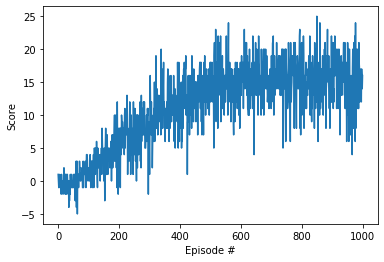

In [7]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from dqn_agent_new import Agent

agent = Agent(state_size=37, action_size=4, seed=0, mode='DDQN')

def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    meanlosses = []
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        meanloss = np.mean(agent.losses)
        agent.losses = []
        meanlosses.append(meanloss)
        print('\rEpisode {}\tAverage Score: {:.2f} \tAverage Loss: {:.8f} '.format(i_episode, np.mean(scores_window), meanloss), end="")

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        #if np.mean(scores_window)>=14.0:
        #    print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        #    break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


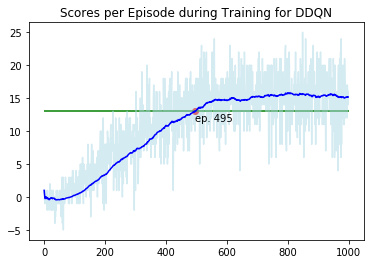

In [35]:
scores_avg = []
scores_window = deque(maxlen=100)
success = False
for i,x in enumerate(scores):
    scores_window.append(x)
    m = np.mean(scores_window)
    if m>13 and success == False:
        x_success = i
        y_success = m
        success = True
    scores_avg.append(np.mean(scores_window))
plt.plot(scores,color='lightblue',alpha=0.5)
plt.plot(scores_avg, color='blue')
plt.scatter(x_success,y_success, color='red')
plt.text(x_success,y_success-1.5,"ep. {}".format(x_success))
plt.hlines(13.0,0,1000, color='green')
plt.title("Scores per Episode during Training for "+ "DDQN")
plt.savefig('learning_ddqn.png')

In [8]:
torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_ddqn.pth')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(array([ 2.,  5.,  9.,  3., 21., 14., 17., 15., 11.,  3.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

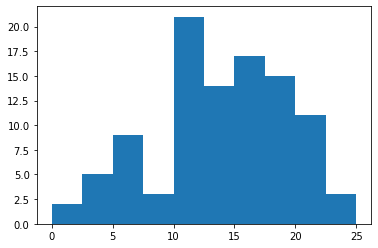

In [36]:
scores = []
for N in range(100):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, 0.01)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    scores.append(score)

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for Agent after Training of 1000 Episodes \n Mean {:2f} and Std Dev {:2f}'.format(np.mean(scores), np.std(scores)))
plt.hist(scores, normed=1)
plt.savefig('distribution_ddqn_agent.png')